# K Means algorithm

In [7]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Divya\Downloads\Online Retail dataset.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
df_cleaned = df.dropna(subset=["CustomerID"])
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(int)

C:\Users\Divya\AppData\Local\Temp\ipykernel_16360\3739072152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(int)


In [10]:
df_cleaned["CustomerID"]

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 406829, dtype: int32

In [11]:
current_date = df_cleaned["InvoiceDate"].max()
current_date

Timestamp('2011-12-09 12:50:00')

In [27]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary', 'Cluster'], dtype='object')

In [13]:
# Calculate Recency: Days since the last purchase
recency_df = df_cleaned.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency_df["Recency"] = (current_date - recency_df["InvoiceDate"]).dt.days

In [14]:
recency_df

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309
...,...,...,...
4367,18280,2011-03-07 09:52:00,277
4368,18281,2011-06-12 10:53:00,180
4369,18282,2011-12-02 11:43:00,7
4370,18283,2011-12-06 12:02:00,3


In [15]:
# Calculate Frequency: Number of unique transactions per customer
frequency_df = df_cleaned.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequency_df.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)

In [16]:
frequency_df

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [17]:
# Calculate Monetary: Total spending per customer
df_cleaned["TotalPrice"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

C:\Users\Divya\AppData\Local\Temp\ipykernel_16360\147569144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["TotalPrice"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]


In [18]:
df_cleaned["TotalPrice"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 406829, dtype: float64

In [19]:
monetary_df = df_cleaned.groupby("CustomerID")["TotalPrice"].sum().reset_index()
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace=True)

In [20]:
monetary_df

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88


In [21]:
# Merge all RFM metrics into a single DataFrame
rfm = recency_df.merge(frequency_df, on="CustomerID").merge(monetary_df, on="CustomerID")
rfm.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346,2011-01-18 10:17:00,325,2,0.00
1,12347,2011-12-07 15:52:00,1,7,4310.00
2,12348,2011-09-25 13:13:00,74,4,1797.24
3,12349,2011-11-21 09:51:00,18,1,1757.55
4,12350,2011-02-02 16:01:00,309,1,334.40


In [22]:
rfm = rfm[["Recency", "Frequency", "Monetary"]]

In [23]:
rfm

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,7,4310.00
2,74,4,1797.24
3,18,1,1757.55
4,309,1,334.40
...,...,...,...
4367,277,1,180.60
4368,180,1,80.82
4369,7,3,176.60
4370,3,16,2094.88


In [24]:
# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [25]:
rfm_scaled

array([[ 2.32202285, -0.32936215, -0.23100099],
       [-0.89373323,  0.20610242,  0.29343167],
       [-0.1691956 , -0.11517632, -0.01231622],
       ...,
       [-0.83418219, -0.22226923, -0.20951263],
       [-0.87388289,  1.16993863,  0.02390005],
       [-0.48680114, -0.22226923, -0.00744423]])

In [26]:
# Apply K-Means clustering with 3 clusters (default choice)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,Recency,Frequency,Monetary,Cluster
0,325,2,0.00,0
1,1,7,4310.00,1
2,74,4,1797.24,1
3,18,1,1757.55,1
4,309,1,334.40,0


# Hierarchical Algorithm

In [29]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Divya\Downloads\Online Retail dataset.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Data preprocessing: Aggregating customer purchase behavior
df_clean = df.dropna(subset=["CustomerID"])  # Remove rows with missing CustomerID
df_clean["TotalSpent"] = df_clean["Quantity"] * df_clean["UnitPrice"]  # Calculate total spending

C:\Users\Divya\AppData\Local\Temp\ipykernel_16360\2538218157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TotalSpent"] = df_clean["Quantity"] * df_clean["UnitPrice"]  # Calculate total spending


In [35]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
# Aggregate by CustomerID
customer_data = df_clean.groupby("CustomerID").agg(
    TotalSpent=("TotalSpent", "sum"), 
    TotalQuantity=("Quantity", "sum"), 
    PurchaseFrequency=("InvoiceNo", "nunique")  # Unique transactions
).reset_index()

In [38]:
customer_data

,CustomerID,TotalSpent,TotalQuantity,PurchaseFrequency
0,12346.0,0.00,0,2
1,12347.0,4310.00,2458,7
2,12348.0,1797.24,2341,4
3,12349.0,1757.55,631,1
4,12350.0,334.40,197,1
...,...,...,...,...
4367,18280.0,180.60,45,1
4368,18281.0,80.82,54,1
4369,18282.0,176.60,98,3
4370,18283.0,2094.88,1397,16


In [39]:
# Normalize the data for clustering
customer_features = customer_data[["TotalSpent", "TotalQuantity", "PurchaseFrequency"]]
customer_features = (customer_features - customer_features.min()) / (customer_features.max() - customer_features.min())


In [41]:
customer_features.min()

TotalSpent           0.0
TotalQuantity        0.0
PurchaseFrequency    0.0
dtype: float64

In [42]:
customer_features.max()

TotalSpent           1.0
TotalQuantity        1.0
PurchaseFrequency    1.0
dtype: float64

In [40]:
customer_features

,TotalSpent,TotalQuantity,PurchaseFrequency
0,0.015109,0.001538,0.004049
1,0.030297,0.014014,0.024291
2,0.021442,0.013420,0.012146
3,0.021303,0.004741,0.000000
4,0.016288,0.002538,0.000000
...,...,...,...
4367,0.015746,0.001766,0.000000
4368,0.015394,0.001812,0.000000
4369,0.015731,0.002035,0.008097
4370,0.022491,0.008628,0.060729


In [43]:
# Apply hierarchical clustering
linkage_matrix = linkage(customer_features, method="ward")

In [44]:
linkage_matrix

array([[0.00000000e+00, 8.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+02, 4.37200000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.13000000e+02, 4.37300000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [8.73600000e+03, 8.73900000e+03, 1.75414304e+00, 2.40000000e+01],
       [8.73300000e+03, 8.73800000e+03, 1.79413703e+00, 4.34800000e+03],
       [8.74000000e+03, 8.74100000e+03, 3.35299370e+00, 4.37200000e+03]])

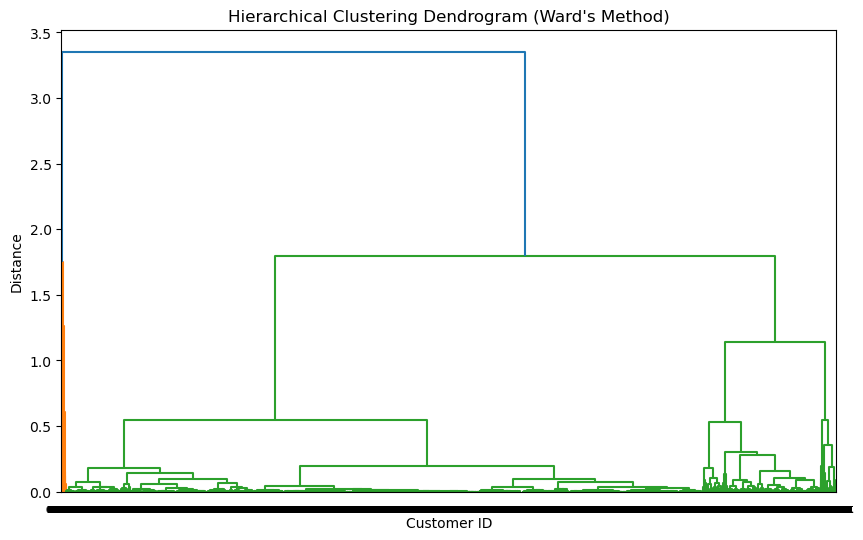

In [48]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=customer_data["CustomerID"].values, leaf_rotation=180, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Customer ID")
plt.ylabel("Distance")
plt.show()